### IMPORTING LIBRARIES

In [223]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import f1_score,confusion_matrix,classification_report
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### IMPORTING DATA

In [241]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [226]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [243]:
## Concatenate the Data Frames
X=pd.concat([X,geography,gender],axis=1)
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

### SMOTE

In [244]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X,y = smt.fit_sample(X,y)

### DATA SPLITTING

In [245]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0,stratify=y)

### FEAATURE SCALING

In [246]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### XGB CLASSIFIER

In [247]:
# importing XGB classifier
import xgboost
from xgboost import XGBClassifier

In [248]:
# creating model object
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
predictions = model.predict(X_test)
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)

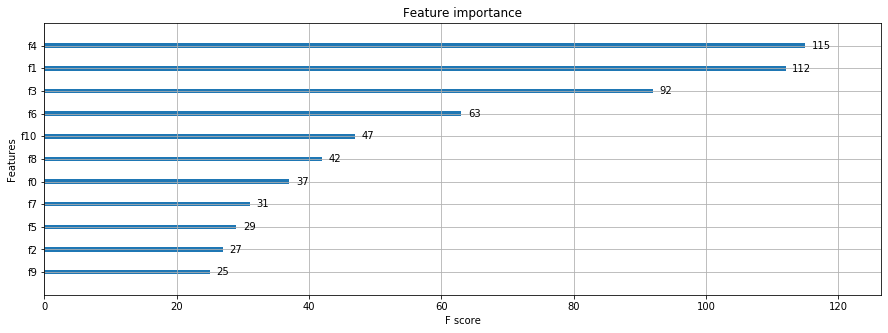

In [249]:
# plotting important features for a quick idea of which contribute to the model perfromance better
import matplotlib.pyplot as plt
xgboost.plot_importance(model)
plt.rcParams['figure.figsize'] = [15, 5]
plt.show()

### CROSS VALIDATION

In [250]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [251]:
# testing the cross validated model
model2 = XGBClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=7)
results = cross_val_score(model2, X, y, cv=kfold)

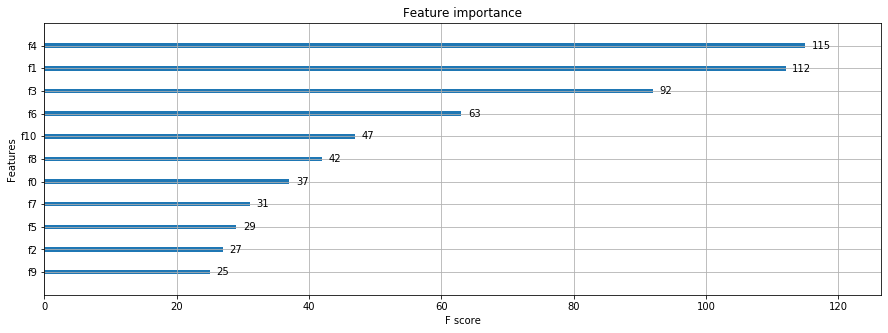

In [252]:
# plot feature importance
from matplotlib import pyplot
#plt.figure(figsize=(8,18))
xgboost.plot_importance(model)
plt.show()

In [253]:
from sklearn.feature_selection import SelectFromModel
thresholds = np.sort(model.feature_importances_)
for thresh in thresholds:
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Model using {} features".format(select_X_train.shape[1]))
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1],accuracy*100.0))

Model using 11 features
Thresh=0.007, n=11, Accuracy: 89.64%
Model using 10 features
Thresh=0.007, n=10, Accuracy: 89.77%
Model using 9 features
Thresh=0.018, n=9, Accuracy: 89.77%
Model using 8 features
Thresh=0.024, n=8, Accuracy: 89.70%
Model using 7 features
Thresh=0.046, n=7, Accuracy: 89.49%
Model using 6 features
Thresh=0.090, n=6, Accuracy: 89.30%
Model using 5 features
Thresh=0.093, n=5, Accuracy: 88.20%
Model using 4 features
Thresh=0.147, n=4, Accuracy: 87.66%
Model using 3 features
Thresh=0.157, n=3, Accuracy: 84.15%
Model using 2 features
Thresh=0.199, n=2, Accuracy: 76.68%
Model using 1 features
Thresh=0.213, n=1, Accuracy: 67.73%


In [254]:
from sklearn.feature_selection import SelectFromModel
# select features using threshold
thresh= 0.024

selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)

# train model
selection_model = XGBClassifier()
selection_model.fit(select_X_train, y_train)

# eval model
select_X_test = selection.transform(X_test)
y_pred = selection_model.predict(select_X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1],accuracy*100.0))

Thresh=0.024, n=7, Accuracy: 89.49%


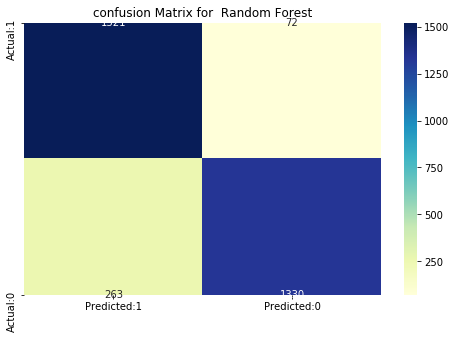

In [255]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:0'],index=['Actual:1','Actual:0'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("confusion Matrix for  Random Forest")
plt.show()

In [269]:
from sklearn.metrics import precision_score,recall_score
print("Accuracy Score for XGB:",round(accuracy_score(y_test,y_pred),2),"%\n")
print("F1 score :",round(f1_score(y_test,y_pred),2),"%\n")
print("Precision Score :",round(precision_score(y_test,y_pred),2),"%\n")
print("Recall Score:",round(recall_score(y_test,y_pred),2),"%\n")
print("-"*100)
print("\n")
print("classification report for XGB Classifier :\n\n",classification_report(y_test, y_pred))

Accuracy Score for XGB: 0.89 %

F1 score : 0.89 %

Precision Score : 0.95 %

Recall Score: 0.83 %

----------------------------------------------------------------------------------------------------


classification report for XGB Classifier :

               precision    recall  f1-score   support

           0       0.85      0.95      0.90      1593
           1       0.95      0.83      0.89      1593

    accuracy                           0.89      3186
   macro avg       0.90      0.89      0.89      3186
weighted avg       0.90      0.89      0.89      3186



### -----------------------------------------------------------END-------------------------------------------------------------